#### cat boost grid search 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error
from sklearn.metrics import roc_auc_score,recall_score,make_scorer,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,auc
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.utils import  shuffle
from catboost import CatBoostClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.combine import SMOTETomek


In [9]:
#without any balancing__ gridsearch

In [10]:
df = pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [11]:
X = df.drop(["CONS_NO","FLAG"],axis=1)
y = df.FLAG
X = np.array(X.values)
y = np.array(y.values)


In [12]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=1,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train,test_size=0.20)

In [11]:
y_pred=model_cat.predict(x_test)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7454
           1       0.87      0.89      0.88      7217

    accuracy                           0.88     14671
   macro avg       0.88      0.88      0.88     14671
weighted avg       0.88      0.88      0.88     14671



In [12]:
results =pd.DataFrame(grid_model.cv_results_)

In [14]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_matthews_corrcoef,split1_test_matthews_corrcoef,split2_test_matthews_corrcoef,mean_test_matthews_corrcoef,std_test_matthews_corrcoef,rank_test_matthews_corrcoef,split0_train_matthews_corrcoef,split1_train_matthews_corrcoef,split2_train_matthews_corrcoef,mean_train_matthews_corrcoef,std_train_matthews_corrcoef
0,14.296920,0.137788,6.213925,0.046055,0.3,5,20,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti...",0.492282,0.565423,0.561826,0.539844,0.033663,32,0.586667,0.542631,0.547302,0.558867,0.019750
1,14.381962,0.040385,6.189245,0.058727,0.3,5,50,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti...",0.570460,0.668402,0.665716,0.634859,0.045550,28,0.699444,0.651526,0.647506,0.666159,0.023593
2,15.146864,0.446848,6.195775,0.036711,0.3,5,75,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti...",0.598792,0.711720,0.707756,0.672756,0.052325,24,0.751769,0.695671,0.697451,0.714964,0.026036
3,15.218635,0.109458,6.192365,0.046071,0.3,5,100,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti...",0.624957,0.739800,0.741161,0.701973,0.054461,18,0.787666,0.733631,0.735811,0.752369,0.024974
4,15.957386,0.056528,6.305872,0.261065,0.3,10,20,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est...",0.592958,0.688864,0.672800,0.651541,0.041940,27,0.744508,0.710660,0.699965,0.718378,0.018986
5,19.466230,0.157897,6.123692,0.029230,0.3,10,50,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est...",0.686062,0.793804,0.787729,0.755865,0.049421,12,0.878089,0.852410,0.847020,0.859173,0.013555
6,22.378027,0.119924,6.238219,0.047498,0.3,10,75,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est...",0.728437,0.837141,0.839858,0.801812,0.051896,7,0.929846,0.912509,0.916270,0.919542,0.007446
7,25.293997,0.218653,6.187605,0.033319,0.3,10,100,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est...",0.754351,0.866390,0.869006,0.829916,0.053443,2,0.956614,0.953136,0.950332,0.953361,0.002569
8,12.640849,0.552882,0.000000,0.000000,0.3,20,20,"{'learning_rate': 0.3, 'max_depth': 20, 'n_est...",NaN,NaN,NaN,NaN,NaN,46,NaN,NaN,NaN,NaN,NaN
9,12.214710,0.039683,0.000000,0.000000,0.3,20,50,"{'learning_rate': 0.3, 'max_depth': 20, 'n_est...",NaN,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN


## smoteteck 100


In [5]:
smote_k = SMOTETomek(sampling_strategy=1,random_state=0,n_jobs=-1)

smotek_train,smotek_y_train = smote_k.fit_resample(X,y)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(smotek_train,smotek_y_train,test_size=0.20)

In [76]:
len(smotek_y_train)

73352

In [77]:
print(f"theft flagged :{sum(smotek_y_train)}")

theft flagged :36676


<AxesSubplot:ylabel='count'>

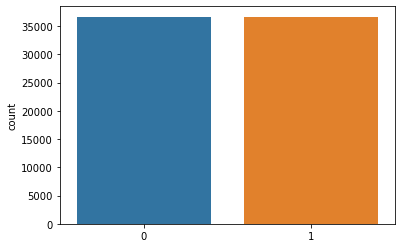

In [75]:
sns.countplot(x=smotek_y_train)

extra trees +smoteteck

In [7]:
model_ext_op1 =ExtraTreesClassifier(n_jobs=-1,max_depth=72,n_estimators=500,verbose = 0)
model_ext_op1.fit(x_train,y_train)
y_extra_op1 = model_ext_op1.predict(x_test)
print(classification_report(y_test,y_extra_op1))
matthews_corrcoef(y_test,y_extra_op1)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7329
           1       0.97      0.98      0.97      7342

    accuracy                           0.97     14671
   macro avg       0.97      0.97      0.97     14671
weighted avg       0.97      0.97      0.97     14671



0.9446742839022008

In [14]:
model_ext = ExtraTreesClassifier(n_jobs=-1)
model_ext.fit(x_train,y_train)
y_pred_et = model_ext.predict(x_test)
print(classification_report(y_test,y_pred_et))
matthews_corrcoef(y_test,y_pred_et)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7273
           1       0.97      0.97      0.97      7398

    accuracy                           0.97     14671
   macro avg       0.97      0.97      0.97     14671
weighted avg       0.97      0.97      0.97     14671



0.9442481818677609

In [15]:
model_ext_op =ExtraTreesClassifier(n_jobs=-1,max_depth=70,n_estimators=500,verbose = 0)
model_ext_op.fit(x_train,y_train)
y_extra_op = model_ext_op.predict(x_test)
print(classification_report(y_test,y_extra_op))
matthews_corrcoef(y_test,y_extra_op)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7273
           1       0.97      0.98      0.98      7398

    accuracy                           0.98     14671
   macro avg       0.98      0.98      0.98     14671
weighted avg       0.98      0.98      0.98     14671



0.9516094703726368

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix Proposed Model, SMOTE Tomek Sampling
[[7051  222]
 [ 187 7211]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Proposed Model,SMOTE Tomek Sampling
[[0.96947614 0.03052386]
 [0.0252771  0.9747229 ]]


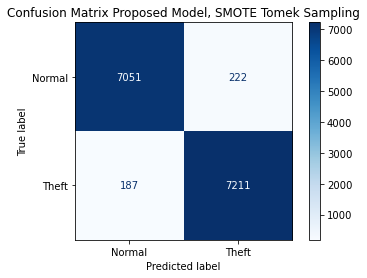

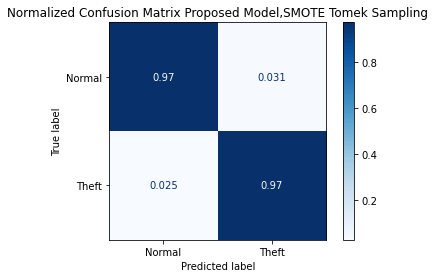

In [16]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix Proposed Model, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix Proposed Model,SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ext,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix Proposed Model, SMOTE Tomek Sampling
[[7079  194]
 [ 161 7237]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix Proposed Model,SMOTE Tomek Sampling
[[0.973326   0.026674  ]
 [0.02176264 0.97823736]]


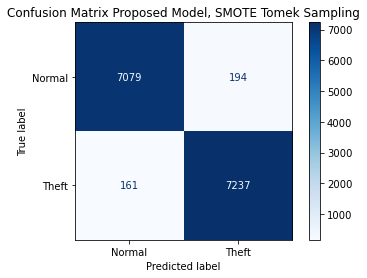

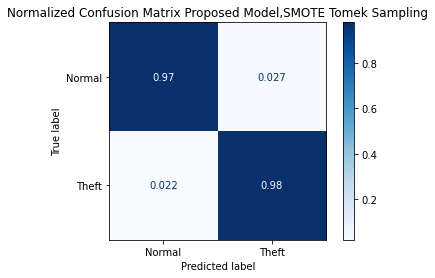

In [17]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix Proposed Model, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix Proposed Model,SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ext_op,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [18]:
probs_et_smt = model_ext.predict_proba(x_test)
preds_et_smt = probs_et_smt[:,1]
fpr_et_smt,tpr_et_smt,thresold = roc_curve(y_test,preds_et_smt)
roc_auc_et_smt = auc(fpr_et_smt,tpr_et_smt)


In [19]:
probs_etra_smt = model_ext_op.predict_proba(x_test)
preds_etra_smt = probs_etra_smt[:,1]
fpr_etra_smt,tpr_etra_smt,thresold = roc_curve(y_test,preds_etra_smt)
roc_auc_etra_smt = auc(fpr_etra_smt,tpr_etra_smt)

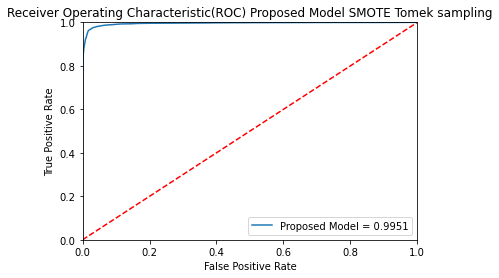

In [20]:
plt.title("Receiver Operating Characteristic(ROC) Proposed Model SMOTE Tomek sampling")
plt.plot(fpr_et_smt,tpr_et_smt,label="Proposed Model = %0.4f" %roc_auc_et_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

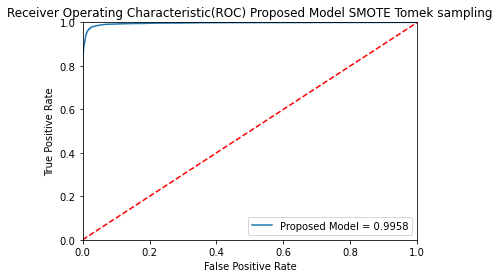

In [21]:
plt.title("Receiver Operating Characteristic(ROC) Proposed Model SMOTE Tomek sampling")
plt.plot(fpr_etra_smt,tpr_etra_smt,label="Proposed Model = %0.4f" %roc_auc_etra_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

light boost + smotetech

In [12]:
#light boosting classifier
model_light= LGBMClassifier(n_jobs=-1)
model_light.fit(x_train,y_train)
y_light_smote_t = model_light.predict(x_test)
print(classification_report(y_test,y_light_smote_t))
matthews_corrcoef(y_test,y_light_smote_t)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7307
           1       0.87      0.88      0.88      7364

    accuracy                           0.88     14671
   macro avg       0.88      0.88      0.88     14671
weighted avg       0.88      0.88      0.88     14671



0.7529929620325232

Confusion Matrix LGBoost, SMOTE Tomek Sampling
[[6373  934]
 [ 878 6486]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix LGBoost, SMOTE Tomek Sampling
[[0.87217736 0.12782264]
 [0.11922868 0.88077132]]


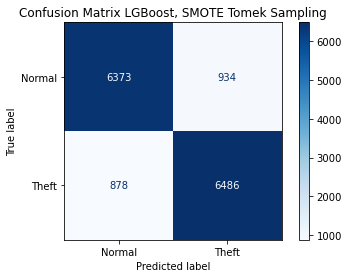

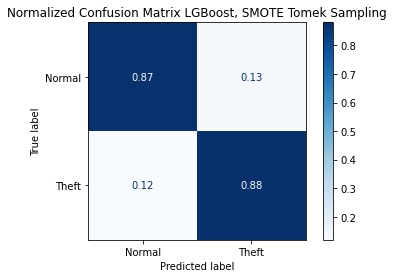

In [13]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix LGBoost, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix LGBoost, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_light,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [14]:
probs_lgb_smt = model_light.predict_proba(x_test)
preds_lgb_smt = probs_lgb_smt[:,1]
fpr_lgb_smt,tpr_lgb_smt,thresold = roc_curve(y_test,preds_lgb_smt)
roc_auc_lgb_smt = auc(fpr_lgb_smt,tpr_lgb_smt)


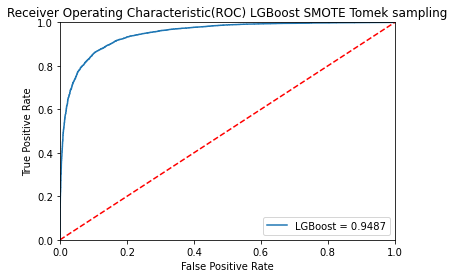

In [15]:
plt.title("Receiver Operating Characteristic(ROC) LGBoost SMOTE Tomek sampling")
plt.plot(fpr_lgb_smt,tpr_lgb_smt,label="LGBoost = %0.4f" %roc_auc_lgb_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

grad_boost + smotetech

In [22]:
#gradient boosting classifier
model_grad= GradientBoostingClassifier()
model_grad.fit(x_train,y_train)
y_grad_smote_t = model_grad.predict(x_test)
print(classification_report(y_test,y_grad_smote_t))
matthews_corrcoef(y_test,y_grad_smote_t)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      7273
           1       0.78      0.80      0.79      7398

    accuracy                           0.78     14671
   macro avg       0.78      0.78      0.78     14671
weighted avg       0.78      0.78      0.78     14671



0.5680073669780752

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix GBoost, SMOTE Tomek Sampling
[[5568 1705]
 [1465 5933]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix GBost, SMOTE Tomek Sampling
[[0.76557129 0.23442871]
 [0.19802649 0.80197351]]


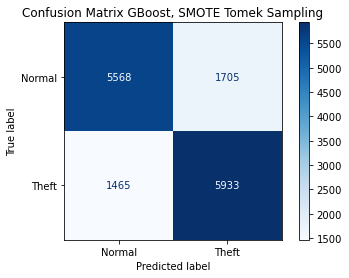

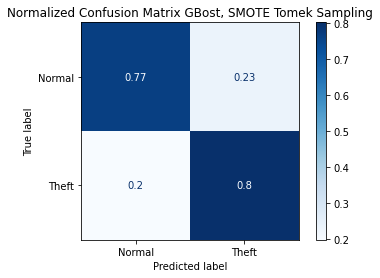

In [23]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix GB, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix GB, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grad,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [24]:
probs_grad_smt = model_grad.predict_proba(x_test)
preds_grad_smt = probs_grad_smt[:,1]
fpr_grad_smt,tpr_grad_smt,thresold = roc_curve(y_test,preds_grad_smt)
roc_auc_grad_smt = auc(fpr_grad_smt,tpr_grad_smt)

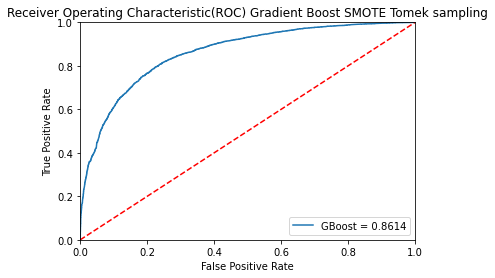

In [25]:
plt.title("Receiver Operating Characteristic(ROC) Gradient Boost SMOTE Tomek sampling")
plt.plot(fpr_grad_smt,tpr_grad_smt,label="GBoost = %0.4f" %roc_auc_grad_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

xgboost+smotetech

In [17]:
model_Xgboost =XGBClassifier(n_jobs=-1)
model_Xgboost.fit(x_train,y_train)
y_xgboost_smote_t = model_Xgboost.predict(x_test)
print(classification_report(y_test,y_xgboost_smote_t))
matthews_corrcoef(y_test,y_xgboost_smote_t)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:36:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7307
           1       0.87      0.91      0.89      7364

    accuracy                           0.89     14671
   macro avg       0.89      0.89      0.89     14671
weighted avg       0.89      0.89      0.89     14671



0.7760076689227215

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix XGB, SMOTE Tomek Sampling
[[6311  996]
 [ 653 6711]]
Normalized Confusion Matrix XGB, SMOTE Tomek Sampling
[[0.86369235 0.13630765]
 [0.08867463 0.91132537]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


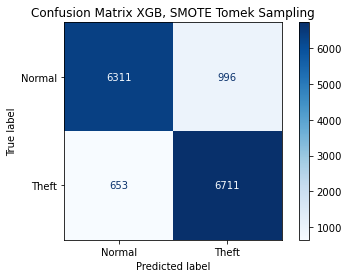

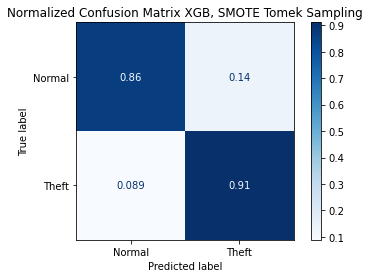

In [39]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix XGB, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix XGB, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_Xgboost,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [40]:
probs_xgb_smt = model_Xgboost.predict_proba(x_test)
preds_xgb_smt = probs_xgb_smt[:,1]
fpr_xgb_smt,tpr_xgb_smt,thresold = roc_curve(y_test,preds_xgb_smt)
roc_auc_xgb_smt = auc(fpr_xgb_smt,tpr_xgb_smt)


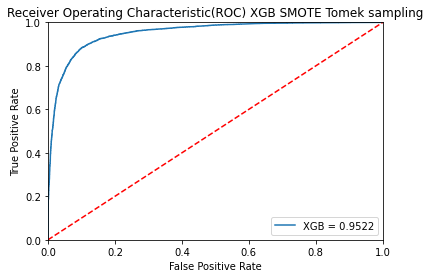

In [41]:
plt.title("Receiver Operating Characteristic(ROC) XGB SMOTE Tomek sampling")
plt.plot(fpr_xgb_smt,tpr_xgb_smt,label="XGB = %0.4f" %roc_auc_xgb_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

adaboost+ smotet

In [26]:
model_ada=AdaBoostClassifier()
model_ada.fit(x_train,y_train)
y_ada_smote_t = model_ada.predict(x_test)
print(classification_report(y_test,y_ada_smote_t))
matthews_corrcoef(y_test,y_ada_smote_t)


              precision    recall  f1-score   support

           0       0.74      0.71      0.73      7273
           1       0.73      0.76      0.74      7398

    accuracy                           0.73     14671
   macro avg       0.73      0.73      0.73     14671
weighted avg       0.73      0.73      0.73     14671



0.4683767956846665

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix ADB, SMOTE Tomek Sampling
[[5171 2102]
 [1799 5599]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix ADB, SMOTE Tomek Sampling
[[0.71098584 0.28901416]
 [0.24317383 0.75682617]]


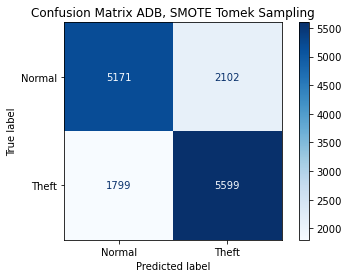

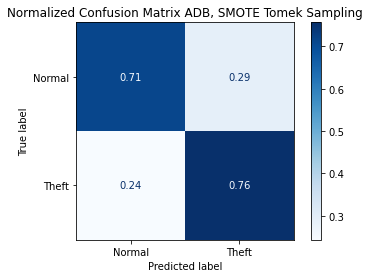

In [27]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix ADB, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix ADB, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_ada,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [28]:
probs_ada_smt = model_ada.predict_proba(x_test)
preds_ada_smt = probs_ada_smt[:,1]
fpr_ada_smt,tpr_ada_smt,thresold = roc_curve(y_test,preds_ada_smt)
roc_auc_ada_smt = auc(fpr_ada_smt,tpr_ada_smt)


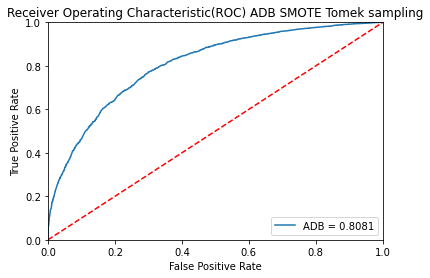

In [29]:
plt.title("Receiver Operating Characteristic(ROC) ADB SMOTE Tomek sampling")
plt.plot(fpr_ada_smt,tpr_ada_smt,label="ADB = %0.4f" %roc_auc_ada_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

decision tree + smotet

In [30]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_dt_smote_t = model_dt.predict(x_test)
print(classification_report(y_test,y_dt_smote_t))
matthews_corrcoef(y_test,y_dt_smote_t)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7273
           1       0.83      0.87      0.85      7398

    accuracy                           0.84     14671
   macro avg       0.84      0.84      0.84     14671
weighted avg       0.84      0.84      0.84     14671



0.6854120582476863

Confusion Matrix DT, SMOTE Tomek Sampling
[[5930 1343]
 [ 970 6428]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix DT, SMOTE Tomek Sampling
[[0.81534442 0.18465558]
 [0.13111652 0.86888348]]


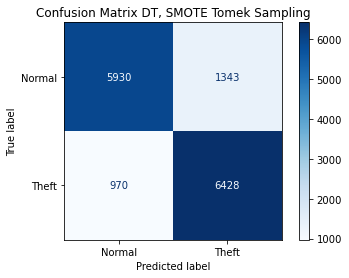

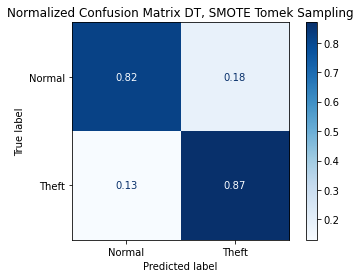

In [31]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix DT, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix DT, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_dt,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [32]:
probs_dt_smt = model_dt.predict_proba(x_test)
preds_dt_smt = probs_dt_smt[:,1]
fpr_dt_smt,tpr_dt_smt,thresold = roc_curve(y_test,preds_dt_smt)
roc_auc_dt_smt = auc(fpr_dt_smt,tpr_dt_smt)


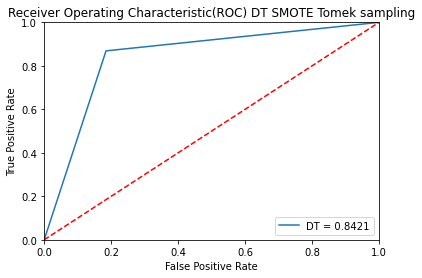

In [33]:
plt.title("Receiver Operating Characteristic(ROC) DT SMOTE Tomek sampling")
plt.plot(fpr_dt_smt,tpr_dt_smt,label="DT = %0.4f" %roc_auc_dt_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Random forest+ smotet

In [20]:
model_rf = RandomForestClassifier(n_jobs=-1)
model_rf.fit(x_train,y_train)
y_rf_somte_t= model_rf.predict(x_test)
print(classification_report(y_test,y_rf_somte_t))
matthews_corrcoef(y_test,y_rf_somte_t)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7307
           1       0.95      0.96      0.95      7364

    accuracy                           0.95     14671
   macro avg       0.95      0.95      0.95     14671
weighted avg       0.95      0.95      0.95     14671



0.9055442389245306

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix RF, SMOTE Tomek Sampling
[[6936  371]
 [ 322 7042]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix RF, SMOTE Tomek Sampling
[[0.94922677 0.05077323]
 [0.04372624 0.95627376]]


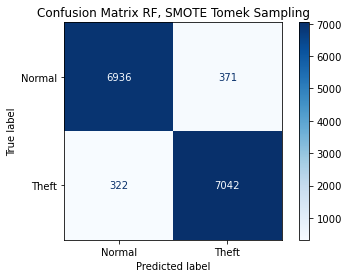

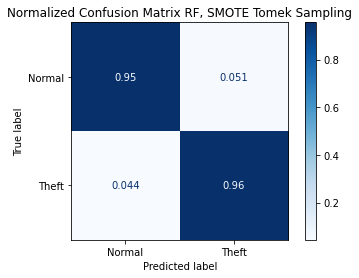

In [48]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix RF, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix RF, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_rf,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [49]:
probs_rf_smt = model_rf.predict_proba(x_test)
preds_rf_smt = probs_rf_smt[:,1]
fpr_rf_smt,tpr_rf_smt,thresold = roc_curve(y_test,preds_rf_smt)
roc_auc_rf_smt = auc(fpr_rf_smt,tpr_rf_smt)


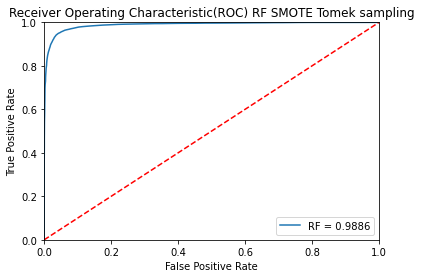

In [71]:
plt.title("Receiver Operating Characteristic(ROC) RF SMOTE Tomek sampling")
plt.plot(fpr_rf_smt,tpr_rf_smt,label="RF = %0.4f" %roc_auc_rf_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

catboost + smotet

In [21]:
model_opcat = CatBoostClassifier(verbose=0,task_type="GPU")
model_opcat.fit(x_train,y_train)
y_opcat_smote_t = model_opcat.predict(x_test)
print(classification_report(y_test,y_opcat_smote_t))
matthews_corrcoef(y_test,y_opcat_smote_t)


              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7307
           1       0.87      0.89      0.88      7364

    accuracy                           0.88     14671
   macro avg       0.88      0.88      0.88     14671
weighted avg       0.88      0.88      0.88     14671



0.7542582834725432

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix CATB, SMOTE Tomek Sampling
[[6292 1015]
 [ 790 6574]]
Normalized Confusion Matrix CATB, SMOTE Tomek Sampling
[[0.8610921  0.1389079 ]
 [0.10727865 0.89272135]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


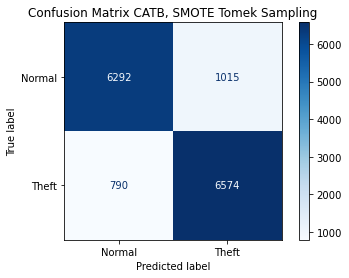

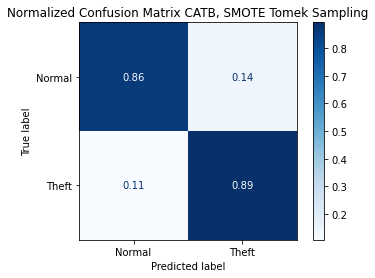

In [51]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix CATB, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix CATB, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_opcat,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [52]:
probs_cat_smt = model_opcat.predict_proba(x_test)
preds_cat_smt = probs_cat_smt[:,1]
fpr_cat_smt,tpr_cat_smt,thresold = roc_curve(y_test,preds_cat_smt)
roc_auc_cat_smt = auc(fpr_cat_smt,tpr_cat_smt)


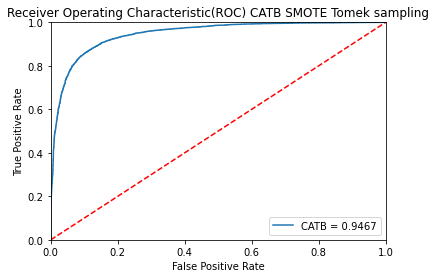

In [53]:
plt.title("Receiver Operating Characteristic(ROC) CATB SMOTE Tomek sampling")
plt.plot(fpr_cat_smt,tpr_cat_smt,label="CATB = %0.4f" %roc_auc_cat_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

kNN + smotet

In [34]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_knn_smote_t = model_knn.predict(x_test)
print(classification_report(y_test,y_knn_smote_t))
matthews_corrcoef(y_test,y_knn_smote_t)



              precision    recall  f1-score   support

           0       1.00      0.39      0.56      7273
           1       0.62      1.00      0.77      7398

    accuracy                           0.69     14671
   macro avg       0.81      0.69      0.66     14671
weighted avg       0.81      0.69      0.66     14671



0.4884535100303381

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix KNN, SMOTE Tomek Sampling
[[2805 4468]
 [   8 7390]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix KNN, SMOTE Tomek Sampling
[[0.38567304 0.61432696]
 [0.00108137 0.99891863]]


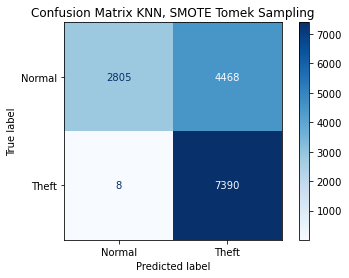

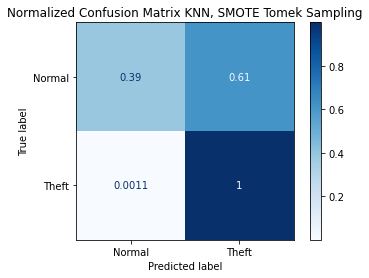

In [35]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix KNN, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix KNN, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_knn,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [36]:
probs_knn_smt = model_knn.predict_proba(x_test)
preds_knn_smt = probs_knn_smt[:,1]
fpr_knn_smt,tpr_knn_smt,thresold = roc_curve(y_test,preds_knn_smt)
roc_auc_knn_smt = auc(fpr_knn_smt,tpr_knn_smt)


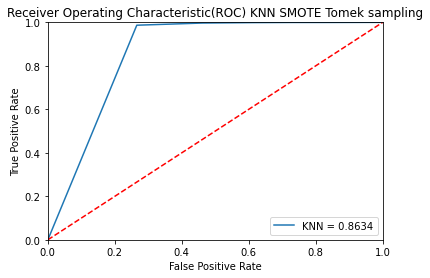

In [37]:
plt.title("Receiver Operating Characteristic(ROC) KNN SMOTE Tomek sampling")
plt.plot(fpr_knn_smt,tpr_knn_smt,label="KNN = %0.4f" %roc_auc_knn_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

LDA+ smotet

In [23]:
mod_lda = LinearDiscriminantAnalysis()
mod_lda.fit(x_train,y_train)
y_pred_lda_smote_t =mod_lda.predict(x_test)
print(classification_report(y_test,y_pred_lda_smote_t))
matthews_corrcoef(y_test,y_pred_lda_smote_t)

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      7307
           1       0.69      0.79      0.73      7364

    accuracy                           0.72     14671
   macro avg       0.72      0.71      0.71     14671
weighted avg       0.72      0.72      0.71     14671



0.43433258709787087

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix LDA, SMOTE Tomek Sampling
[[4709 2598]
 [1580 5784]]
Normalized Confusion Matrix LDA, SMOTE Tomek Sampling
[[0.64445053 0.35554947]
 [0.21455731 0.78544269]]


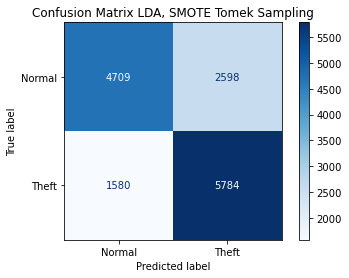

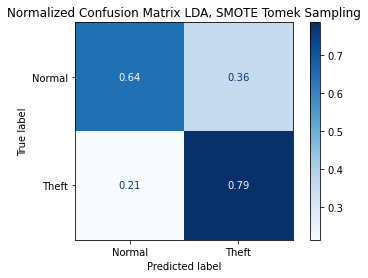

In [57]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix LDA, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix LDA, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(mod_lda,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [58]:
probs_lda_smt = mod_lda.predict_proba(x_test)
preds_lda_smt = probs_lda_smt[:,1]
fpr_lda_smt,tpr_lda_smt,thresold = roc_curve(y_test,preds_lda_smt)
roc_auc_lda_smt = auc(fpr_lda_smt,tpr_lda_smt)


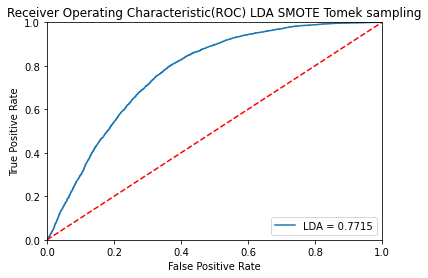

In [60]:
plt.title("Receiver Operating Characteristic(ROC) LDA SMOTE Tomek sampling")
plt.plot(fpr_lda_smt,tpr_lda_smt,label="LDA = %0.4f" %roc_auc_lda_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Logistic Regression + smote_t

In [38]:
model_regress = LogisticRegression(max_iter=2000)
model_regress.fit(x_train,y_train)
y_pred_regress_smote_t = model_regress.predict(x_test)
print(classification_report(y_test,y_pred_regress_smote_t))
matthews_corrcoef(y_test,y_pred_regress_smote_t)

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      7273
           1       0.70      0.76      0.73      7398

    accuracy                           0.72     14671
   macro avg       0.72      0.72      0.72     14671
weighted avg       0.72      0.72      0.72     14671



0.434552586193126

Confusion Matrix LR, SMOTE Tomek Sampling
[[4854 2419]
 [1739 5659]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix LR, SMOTE Tomek Sampling
[[0.66739997 0.33260003]
 [0.23506353 0.76493647]]


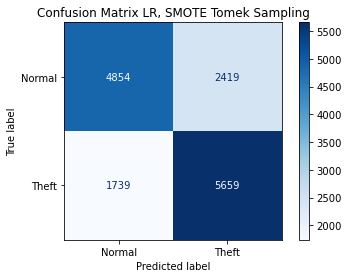

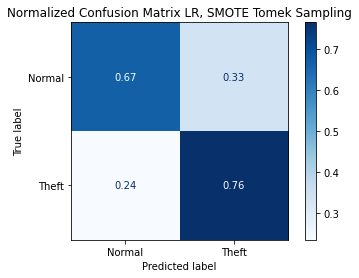

In [39]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix LR, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix LR, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_regress,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [40]:
probs_lr_smt = model_regress.predict_proba(x_test)
preds_lr_smt = probs_lr_smt[:,1]
fpr_lr_smt,tpr_lr_smt,thresold = roc_curve(y_test,preds_lr_smt)
roc_auc_lr_smt = auc(fpr_lr_smt,tpr_lr_smt)


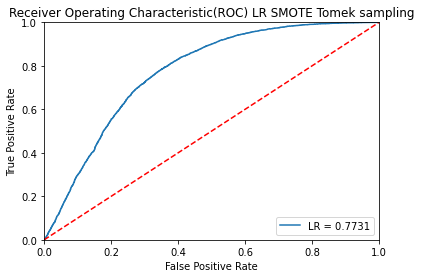

In [41]:
plt.title("Receiver Operating Characteristic(ROC) LR SMOTE Tomek sampling")
plt.plot(fpr_lr_smt,tpr_lr_smt,label="LR = %0.4f" %roc_auc_lr_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

svm_ smote_t

In [ ]:
model_svm = SVC(probability = True)
model_svm.fit(x_train,y_train)
y_pred_svm_smote_t = model_svm.predict(x_test)
print(classification_report(y_test,y_pred_svm_smote_t))
matthews_corrcoef(y_test,y_pred_svm_smote_t)

In [ ]:
#plotting non-normalized confusion matrix

titles = [("Confusion Matrix SVM, SMOTE Tomek Sampling",None),
         ("Normalized Confusion Matrix SVM, SMOTE Tomek Sampling","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_svm,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [ ]:
probs_svm_smt = model_svm.predict_proba(x_test)
preds_svm_smt = probs_svm_smt[:,1]
fpr_svm_smt,tpr_svm_smt,thresold = roc_curve(y_test,preds_svm_smt)
roc_auc_svm_smt = auc(fpr_svm_smt,tpr_svm_smt)


In [ ]:
plt.title("Receiver Operating Characteristic(ROC) SVM SMOTE Tomek sampling")
plt.plot(fpr_svm_smt,tpr_svm_smt,label="SVM = %0.4f" %roc_auc_svm_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

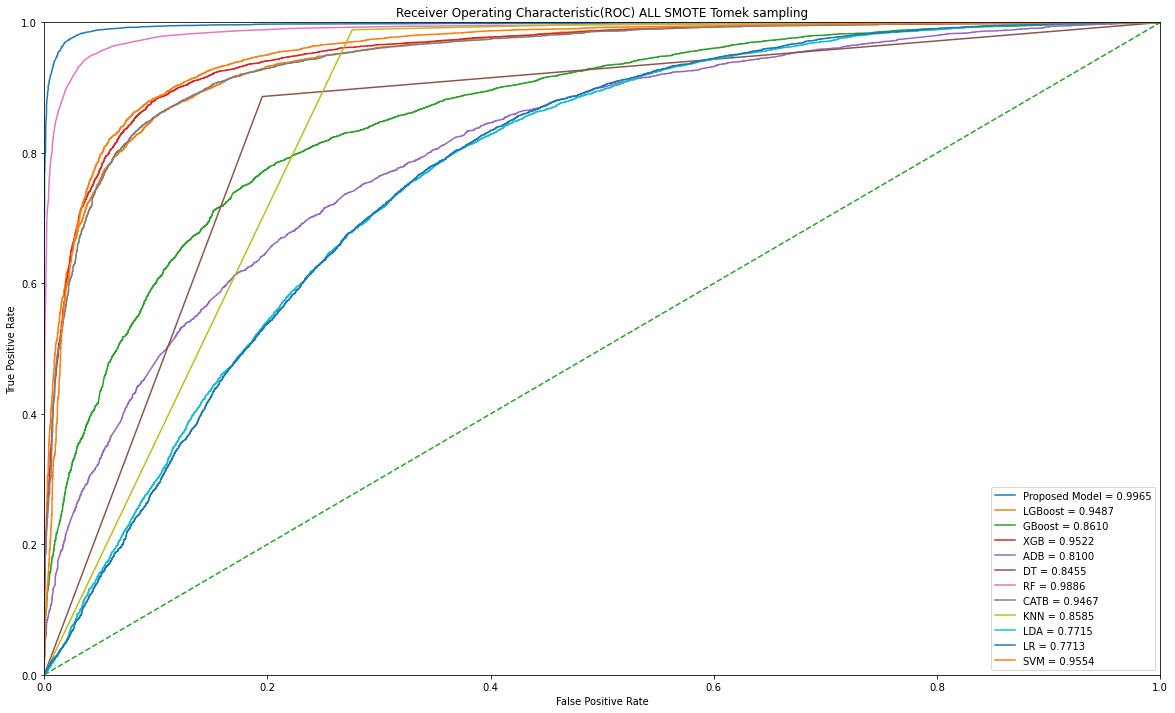

<Figure size 1440x1440 with 0 Axes>

In [72]:
#plotting all
plt.figure(figsize=(20,12))

plt.title("Receiver Operating Characteristic(ROC) ALL SMOTE Tomek sampling")
plt.plot(fpr_etra_smt,tpr_etra_smt,label="Proposed Model = %0.4f" %roc_auc_etra_smt)
plt.plot(fpr_lgb_smt,tpr_lgb_smt,label="LGBoost = %0.4f" %roc_auc_lgb_smt)
plt.plot(fpr_grad_smt,tpr_grad_smt,label="GBoost = %0.4f" %roc_auc_grad_smt)
plt.plot(fpr_xgb_smt,tpr_xgb_smt,label="XGB = %0.4f" %roc_auc_xgb_smt)
plt.plot(fpr_ada_smt,tpr_ada_smt,label="ADB = %0.4f" %roc_auc_ada_smt)
plt.plot(fpr_dt_smt,tpr_dt_smt,label="DT = %0.4f" %roc_auc_dt_smt)
plt.plot(fpr_rf_smt,tpr_rf_smt,label="RF = %0.4f" %roc_auc_rf_smt)
plt.plot(fpr_cat_smt,tpr_cat_smt,label="CATB = %0.4f" %roc_auc_cat_smt)
plt.plot(fpr_knn_smt,tpr_knn_smt,label="KNN = %0.4f" %roc_auc_knn_smt)
plt.plot(fpr_lda_smt,tpr_lda_smt,label="LDA = %0.4f" %roc_auc_lda_smt)
plt.plot(fpr_lr_smt,tpr_lr_smt,label="LR = %0.4f" %roc_auc_lr_smt)
plt.plot(fpr_svm_smt,tpr_svm_smt,label="SVM = %0.4f" %roc_auc_svm_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

## plotting for thesis

In [ ]:
#plotting all
plt.figure(figsize=(20,12))

plt.title("Receiver Operating Characteristic(ROC) ALL SMOTE Tomek sampling")
plt.plot(fpr_etra_smt,tpr_etra_smt,label="Proposed Model = %0.4f" %roc_auc_etra_smt)
plt.plot(fpr_svm_smt,tpr_svm_smt,label="SVM = %0.4f" %roc_auc_svm_smt)
plt.plot(fpr_grad_smt,tpr_grad_smt,label="GBoost = %0.4f" %roc_auc_grad_smt)
plt.plot(fpr_knn_smt,tpr_knn_smt,label="KNN = %0.4f" %roc_auc_knn_smt)
plt.plot(fpr_dt_smt,tpr_dt_smt,label="DT = %0.4f" %roc_auc_dt_smt)
plt.plot(fpr_ada_smt,tpr_ada_smt,label="ADB = %0.4f" %roc_auc_ada_smt)
plt.plot(fpr_lr_smt,tpr_lr_smt,label="LR = %0.4f" %roc_auc_lr_smt)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.figure(figsize=(20,20))
plt.show()

In [26]:
grid_model_ext= GridSearchCV(
estimator=ExtraTreesClassifier(n_jobs=-1),
param_grid={"n_estimators":[100,150,200,250,300]},
    scoring={"matthews_corrcoef":make_scorer(matthews_corrcoef)},
    refit="matthews_corrcoef",
    return_train_score=True,
    cv= 3,
    verbose=1
    
)

In [27]:
grid_model_ext.fit(smotek_train,smotek_y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(n_jobs=-1),
             param_grid={'n_estimators': [100, 150, 200, 250, 300]},
             refit='matthews_corrcoef', return_train_score=True,
             scoring={'matthews_corrcoef': make_scorer(matthews_corrcoef)},
             verbose=1)

In [28]:
results = pd.DataFrame(grid_model_ext.cv_results_)

In [29]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_matthews_corrcoef,split1_test_matthews_corrcoef,split2_test_matthews_corrcoef,mean_test_matthews_corrcoef,std_test_matthews_corrcoef,rank_test_matthews_corrcoef,split0_train_matthews_corrcoef,split1_train_matthews_corrcoef,split2_train_matthews_corrcoef,mean_train_matthews_corrcoef,std_train_matthews_corrcoef
0,28.448248,3.019784,0.585551,0.076660,100,{'n_estimators': 100},0.920271,0.940335,0.941072,0.933892,0.009637,5,1.0,1.0,1.0,1.0,0.0
1,50.239149,1.990184,0.945318,0.079503,150,{'n_estimators': 150},0.921811,0.942231,0.946368,0.936803,0.010735,4,1.0,1.0,1.0,1.0,0.0
2,59.023375,3.145396,1.160211,0.116696,200,{'n_estimators': 200},0.924347,0.944873,0.949616,0.939612,0.010966,2,1.0,1.0,1.0,1.0,0.0
3,78.255184,0.358097,1.490327,0.110714,250,{'n_estimators': 250},0.924267,0.945456,0.946918,0.938880,0.010350,3,1.0,1.0,1.0,1.0,0.0
4,93.337563,5.710805,1.611330,0.136444,300,{'n_estimators': 300},0.925494,0.945981,0.947574,0.939683,0.010054,1,1.0,1.0,1.0,1.0,0.0


In [30]:
model_ext_op = ExtraTreesClassifier(n_jobs=-1,max_depth=70,n_estimators=300)
model_ext_op.fit(x_train,y_train)
y_pred_et_op = model_ext_op.predict(x_test)
print(classification_report(y_test,y_pred_et_op))
matthews_corrcoef(y_test,y_pred_et_op)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7307
           1       0.97      0.98      0.97      7364

    accuracy                           0.97     14671
   macro avg       0.97      0.97      0.97     14671
weighted avg       0.97      0.97      0.97     14671



0.9492276773227376

In [31]:
model_ext_op2 = ExtraTreesClassifier(n_jobs=-1,max_depth=70,n_estimators=500)
model_ext_op2.fit(x_train,y_train)
y_pred_et_op2 = model_ext_op2.predict(x_test)
print(classification_report(y_test,y_pred_et_op2))
matthews_corrcoef(y_test,y_pred_et_op2)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7307
           1       0.97      0.98      0.98      7364

    accuracy                           0.97     14671
   macro avg       0.98      0.97      0.97     14671
weighted avg       0.97      0.97      0.97     14671



0.949914428585485

In [43]:
model_ext.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
grid_model= GridSearchCV(
estimator=ExtraTreesClassifier(n_jobs=-1),
param_grid={"max_depth":[50,60,70,100]},
    scoring={"matthews_corrcoef":make_scorer(matthews_corrcoef)},
    refit="matthews_corrcoef",
    return_train_score=True,
    cv= 3,
    verbose=1
    
)

In [63]:
grid_model.fit(smotek_train,smotek_y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(n_jobs=-1),
             param_grid={'max_depth': [50, 60, 70, 100]},
             refit='matthews_corrcoef', return_train_score=True,
             scoring={'matthews_corrcoef': make_scorer(matthews_corrcoef)},
             verbose=1)

In [64]:
res1 = pd.DataFrame(grid_model.cv_results_)

In [65]:
res1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_matthews_corrcoef,split1_test_matthews_corrcoef,split2_test_matthews_corrcoef,mean_test_matthews_corrcoef,std_test_matthews_corrcoef,rank_test_matthews_corrcoef,split0_train_matthews_corrcoef,split1_train_matthews_corrcoef,split2_train_matthews_corrcoef,mean_train_matthews_corrcoef,std_train_matthews_corrcoef
0,23.343562,0.331085,0.488483,0.010244,50,{'max_depth': 50},0.915272,0.936190,0.939729,0.930397,0.010792,4,0.999796,0.999141,0.999305,0.999414,0.000278
1,22.923457,0.547743,0.453121,0.009717,60,{'max_depth': 60},0.917979,0.938929,0.941706,0.932871,0.010592,3,0.999959,0.999836,0.999755,0.999850,0.000084
2,23.072545,0.427439,0.476379,0.026618,70,{'max_depth': 70},0.919853,0.942100,0.943475,0.935143,0.010826,1,1.000000,1.000000,0.999918,0.999973,0.000039
3,23.744232,0.701994,0.479890,0.024379,100,{'max_depth': 100},0.920672,0.938455,0.944391,0.934506,0.010078,2,1.000000,1.000000,1.000000,1.000000,0.000000
